In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Data preprocessing and model selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Models from Scikit-Learn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluations 
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error, r2_score, mean_absolute_error


In [2]:
#Rastgelelikliğin tekrar taklit edilebilmesi adına seed'imizi 20 olarak seçiyoruz böylelikle tekrardan kodu çalıştırdığımız zaman aynı sonuçlar elde edilebilelim
seed = 20 


Gözümüzde daha güzel canlandırabilmemiz için "Excel" formatı gibi verinin görünüşü Alt kısımdadır

In [3]:
#Masaüstümdeki HouseData dosyasını okutuyorum
df1 = pd.read_csv(r"C:\Users\gokde\Desktop\Proje\HouseData.csv")
df1

,Unnamed: 0,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,...,PriceStatus,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,IsItVideoNavigable?,Subscription,BathroomSquareMeters,BalconySquareMeters
0,0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",24 Şubat 2022,Satılık,160 m2,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,adalar,"1,600,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",02 Mart 2022,Satılık,120 m2,5-10,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,adalar,"18,500,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",11 Şubat 2022,Satılık,350 m2,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,adalar,"9,500,000TL","['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",11 Şubat 2022,Satılık,550 m2,11-15,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,adalar,"25,000,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",19 Ocak 2022,Satılık,840 m2,21 Ve Üzeri,4,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25150,25150,zeytinburnu,"1,850,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",12 Ocak 2022,Satılık,180 m2,5-10,4,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25151,25151,zeytinburnu,"1,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",10 Aralık 2021,Satılık,52 m2,3,16,Kiracı Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25152,25152,zeytinburnu,"9,000,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",26 Şubat 2022,Satılık,176 m2,0 (Yeni),25,Boş,...,Genel Fiyat,NaN,NaN,NaN,55 m2,NaN,NaN,NaN,NaN,NaN
25153,25153,zeytinburnu,"13,000,000TL","['Anasayfa', 'Satılık Residence', 'İstanbul Sa...",18 Ekim 2021,Satılık,170 m2,5-10,30,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Sütun isimleri ( veri çeşitleri / sınıfların isimleri )
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25155 non-null  int64 
 1   district                  25155 non-null  object
 2   price                     25155 non-null  object
 3   address                   25155 non-null  object
 4   AdUpdateDate              25155 non-null  object
 5   Category                  25155 non-null  object
 6   GrossSquareMeters         25155 non-null  object
 7   BuildingAge               25155 non-null  object
 8   NumberFloorsofBuilding    25155 non-null  int64 
 9   UsingStatus               25155 non-null  object
 10  EligibilityForInvestment  21506 non-null  object
 11  BuildStatus               11231 non-null  object
 12  TitleStatus               9712 non-null   object
 13  ItemStatus                18332 non-null  object
 14  NumberOfBathrooms     

In [5]:
#Bu kısım elimizdeki veride kaç adet Ev bulunuyor ve bu evler için kaç çeşit bilgi içeriyor onu gösteriyor (oda sayısı , tuvalet sayısı , evin büyüklüğü vs.)
df1.shape


(25155, 38)

Yukarıda görüldüğü gibi 
25155 farklı ev var , ve 38 adet Sütun var
Bu Sütunlardan 37 tanesi ev hakkında bilgi içeriyorken ilk (yani sıfırıncı) sütun sadece ev sıralaması olarak verilmiştir

In [6]:
df1.isnull().sum()

Unnamed: 0                      0
district                        0
price                           0
address                         0
AdUpdateDate                    0
Category                        0
GrossSquareMeters               0
BuildingAge                     0
NumberFloorsofBuilding          0
UsingStatus                     0
EligibilityForInvestment     3649
BuildStatus                 13924
TitleStatus                 15443
ItemStatus                   6823
NumberOfBathrooms               0
NumberOfWCs                 17026
AdCreationDate                  0
Type                            0
NetSquareMeters                 0
NumberOfRooms                   0
FloorLocation                   0
HeatingType                     0
CreditEligibility               0
InsideTheSite                   0
StructureType               14749
MortgageStatus              19097
Swap                         4316
Balcony                     16046
PriceStatus                     0
RentalIncome  

Data Framelerde ne kadar eksik bilgi var yukarıda görüyoruz

In [7]:
#Sütunların isimleri
df1.columns

Index(['Unnamed: 0', 'district', 'price', 'address', 'AdUpdateDate',
       'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'ItemStatus', 'NumberOfBathrooms',
       'NumberOfWCs', 'AdCreationDate', 'Type', 'NetSquareMeters',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Swap', 'Balcony',
       'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')

Sütunların Başlıkları yukarıda görüyoruz

In [8]:
for column in df1.columns:
    print(df1.groupby(column)[column].agg("count"), "\n", 50*"-")

Unnamed: 0
0        1
1        1
2        1
3        1
4        1
        ..
25150    1
25151    1
25152    1
25153    1
25154    1
Name: Unnamed: 0, Length: 25155, dtype: int64 
 --------------------------------------------------
district
adalar             26
arnavutkoy        256
atasehir          378
avcilar           933
bagcilar          522
bahcelievler     1429
bakirkoy          673
basaksehir        671
bayrampasa        174
besiktas          659
beykoz            148
beylikduzu        888
beyoglu           228
buyukcekmece      756
catalca            74
cekmekoy          923
esenler           265
esenyurt         1415
eyupsultan        635
fatih             488
gaziosmanpasa     709
gungoren          221
kadikoy          1446
kagithane         756
kartal            619
kucukcekmece     1361
maltepe          1230
pendik            678
sancaktepe        918
sariyer          1449
sile               95
silivri           342
sisli             595
sultanbeyli       314
sultangazi  

Artık Bu kısımda tüm data frame'lerin içerisinde olan bilgileri görüyoruz. Bu aşamanın önemi nasıl bir veri ile karşı karşıyayız anlayabilmek.
Veri setinde gördüğümüz gibi analize hazır olmayan bir çok kısım var. Mesela price değişkeninde fiyatlar 1.000.000TLarrow_downward%10 şeklinde fakat biz bu fiyatların
1000000 şeklinde olmasını istiyoruz. Yani string değerleri kaldırmamız ve verileri float haline getirmemiz gerekiyor.

price için daha teferruatlı bir temizlik gerekiyorken , BalconySquareMeters için sade m2 yazısını silmemiz yeterli olucaktır. tabi bu büyük bir veride bütün hepsine tek tek 
bakamayacağımız için görülmesi önemli bir nokta

Yani verileri temizlememiz gerekiyor.

In [9]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

sorted_df1 = df1['price'].sort_values(ascending=False)
print(sorted_df1)

pd.reset_option("max_rows") 
pd.reset_option("max_columns")  


10145                         999,999TL
18557                         999,999TL
7426          999,000TLarrow_downward%5
18238         999,000TLarrow_downward%3
3418         999,000TLarrow_downward%10
9867                          999,000TL
9328                          999,000TL
2082                          999,000TL
18216                         999,000TL
6107                          999,000TL
1562                          999,000TL
9124                          999,000TL
22791                         999,000TL
2875                          999,000TL
22559                         999,000TL
22437                         999,000TL
18792                         998,000TL
9161                          998,000TL
23964        995,000TLarrow_downward%10
22428                         995,000TL
10557                         995,000TL
2419                          995,000TL
17399                         995,000TL
21440                         995,000TL
23474                         995,000TL


In [10]:
#Yeni df oluşturarak ilerleyelim
#Kullanmayacağımız sütunları dropladık ( sildik )
df2 = df1.drop(['Unnamed: 0', 'address', 'AdUpdateDate', 'Category',
        'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 
       'AdCreationDate', 'Type', 'FloorLocation', 'HeatingType', 
       'CreditEligibility', 'InsideTheSite', 'StructureType', 'MortgageStatus', 
       'Swap', 'Balcony', 'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 
       'BalconyType', 'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'], axis = "columns")
df2

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfWCs,NetSquareMeters,NumberOfRooms
0,adalar,"3,100,000TL",160 m2,21 Ve Üzeri,Eşyalı,2,NaN,120 m2,3+1
1,adalar,"1,600,000TL",120 m2,5-10,Eşyalı,1,1,100 m2,2+1
2,adalar,"18,500,000TL",350 m2,21 Ve Üzeri,Boş,3,NaN,300 m2,3+1
3,adalar,"9,500,000TL",550 m2,11-15,NaN,4,NaN,540 m2,8+ Oda
4,adalar,"25,000,000TL",840 m2,21 Ve Üzeri,NaN,3,NaN,700 m2,8+ Oda
...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,"1,850,000TL",180 m2,5-10,NaN,2,2,160 m2,4+1
25151,zeytinburnu,"1,100,000TL",52 m2,3,Boş,1,1,35 m2,1+1
25152,zeytinburnu,"9,000,000TL",176 m2,0 (Yeni),Boş,2,1,175 m2,3+1
25153,zeytinburnu,"13,000,000TL",170 m2,5-10,Boş,2,NaN,155 m2,3+1


Kendimize df2 adında yeni bir veri seti oluşturduk ve bu veri setinde sadece yukarıdaki sütunları çektik çünkü bu değerleri kullanarak analizler gerçekleştirmek istiyoruz.
Bu sebeple diğer kalan sütunlara ihtiyacımız yok 

In [11]:
#Yeni data frame için Eksik Değerler 
df2.isnull().sum()

district                 0
price                    0
GrossSquareMeters        0
BuildingAge              0
ItemStatus            6823
NumberOfBathrooms        0
NumberOfWCs          17026
NetSquareMeters          0
NumberOfRooms            0
dtype: int64

ItemStatus ve NumberOfWCs sütununda eksik veriler olduğunu görüyoruz

In [12]:
# Eksik değerleri distribution rate ile dolduralım 
dist_rate = df2.ItemStatus.value_counts(normalize = True)
print(dist_rate)

dist_rate_wc = df2.NumberOfWCs.value_counts(normalize=True)
print("")
print(dist_rate_wc)


ItemStatus
Boş       0.954124
Eşyalı    0.045876
Name: proportion, dtype: float64

NumberOfWCs
1      0.511748
2      0.387132
3      0.050191
4      0.019191
Yok    0.019191
5      0.006397
6+     0.006151
Name: proportion, dtype: float64


Bu yaklaşım, eksik verileri doldururken veri setinin mevcut dağılımını korumaya çalışır. Bu sayede, elde edilen veri seti, eksik değerleri doldurulmuş ancak orijinal veri setinin özelliklerini koruyan bir yapıya sahip olur

In [13]:
#Bu seedi biz seçiyoruz ki rastgele dağıttığı sayıları her seferinde aynı dağıtsın 
np.random.seed(41)

missing_itemstatus = df2['ItemStatus'].isnull()
missing_wc = df2["NumberOfWCs"].isnull()
df3 = df2.copy()
df3.loc[missing_itemstatus, 'ItemStatus'] = np.random.choice(dist_rate.index, size = len(df2[missing_itemstatus]), p = dist_rate.values)
df3.loc[missing_wc, 'NumberOfWCs'] = np.random.choice(dist_rate_wc.index, size=len(df2[missing_wc]), p=dist_rate_wc.values)
df3

,district,price,GrossSquareMeters,BuildingAge,ItemStatus,NumberOfBathrooms,NumberOfWCs,NetSquareMeters,NumberOfRooms
0,adalar,"3,100,000TL",160 m2,21 Ve Üzeri,Eşyalı,2,1,120 m2,3+1
1,adalar,"1,600,000TL",120 m2,5-10,Eşyalı,1,1,100 m2,2+1
2,adalar,"18,500,000TL",350 m2,21 Ve Üzeri,Boş,3,1,300 m2,3+1
3,adalar,"9,500,000TL",550 m2,11-15,Boş,4,1,540 m2,8+ Oda
4,adalar,"25,000,000TL",840 m2,21 Ve Üzeri,Boş,3,1,700 m2,8+ Oda
...,...,...,...,...,...,...,...,...,...
25150,zeytinburnu,"1,850,000TL",180 m2,5-10,Boş,2,2,160 m2,4+1
25151,zeytinburnu,"1,100,000TL",52 m2,3,Boş,1,1,35 m2,1+1
25152,zeytinburnu,"9,000,000TL",176 m2,0 (Yeni),Boş,2,1,175 m2,3+1
25153,zeytinburnu,"13,000,000TL",170 m2,5-10,Boş,2,2,155 m2,3+1


Bu kısım sütunda eksik olan kısımları yukarıdaki Boş ve Eşyalı oranlarına göre rastgele sütunu doldurur. 'ItemStatus' sütununun mevcut dağılımına göre, %95.4124'ü 'Boş' 
ve %4.5876'sı 'Eşyalı' değerine sahiptir. Bu dağılıma göre, eksik değerler rastgele seçimle 'Boş' veya 'Eşyalı' değerlerinden biriyle doldurulacaktır. Dolayısıyla, 'Boş' değerlerin oranı daha yüksek olduğu için eksik değerlerin büyük çoğunluğu 'Boş' olarak doldurulacaktır. Ancak, rastgele seçim olduğu için bir miktarı da 'Eşyalı' olarak doldurulabilir. Aynı şey NumbersOfWCs sütunu içinde geçerlidir.

In [14]:
dist_rate = df2.ItemStatus.value_counts(normalize = True)
print("df2 için :\n" ,dist_rate)
dist_rate = df3.ItemStatus.value_counts(normalize = True)
print("\ndf3 için :\n" ,dist_rate)

print("\n----------------------------------")

dist_rate_wc = df2.NumberOfWCs.value_counts(normalize=True)
print("\ndf2 için :\n" ,dist_rate_wc)
dist_rate_wc = df3.NumberOfWCs.value_counts(normalize=True)
print("\ndf3 için :\n" ,dist_rate_wc)

df2 için :
 ItemStatus
Boş       0.954124
Eşyalı    0.045876
Name: proportion, dtype: float64

df3 için :
 ItemStatus
Boş       0.954403
Eşyalı    0.045597
Name: proportion, dtype: float64

----------------------------------

df2 için :
 NumberOfWCs
1      0.511748
2      0.387132
3      0.050191
4      0.019191
Yok    0.019191
5      0.006397
6+     0.006151
Name: proportion, dtype: float64

df3 için :
 NumberOfWCs
1      0.517193
2      0.382588
3      0.050566
4      0.019002
Yok    0.018167
6+     0.006440
5      0.006043
Name: proportion, dtype: float64


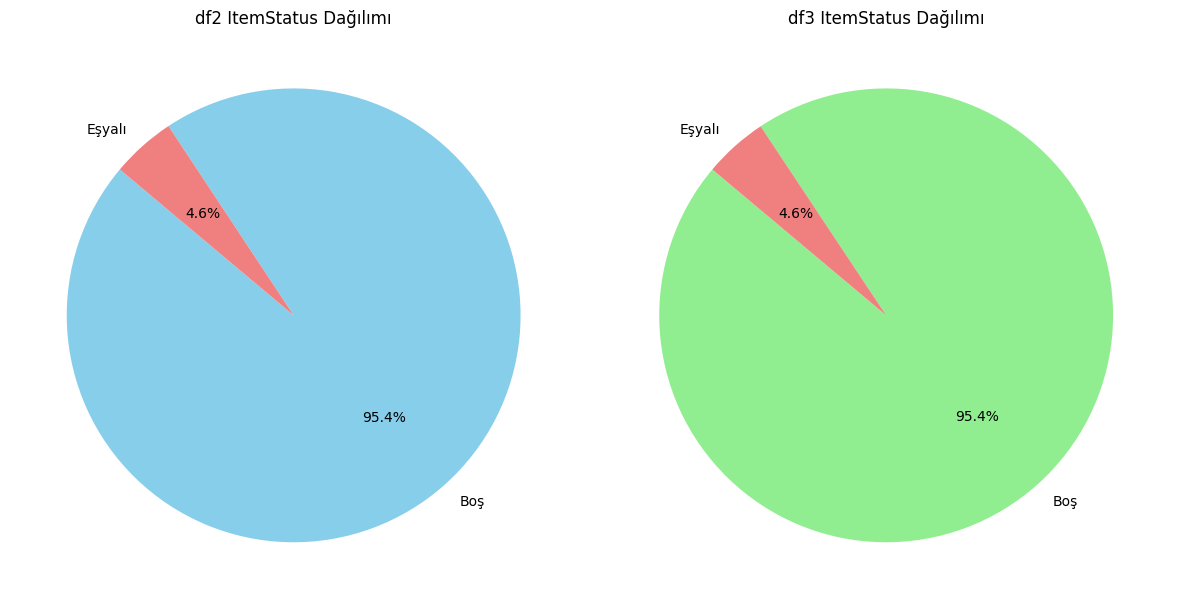

In [15]:
import matplotlib.pyplot as plt

df2_itemstatus_percent = df2['ItemStatus'].value_counts(normalize=True) * 100
df3_itemstatus_percent = df3['ItemStatus'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))

# df2 için pasta grafiği
plt.subplot(1, 2, 1)
plt.pie(df2_itemstatus_percent, labels=df2_itemstatus_percent.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('df2 ItemStatus Dağılımı')

# df3 için pasta grafiği
plt.subplot(1, 2, 2)
plt.pie(df3_itemstatus_percent, labels=df3_itemstatus_percent.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=140)
plt.title('df3 ItemStatus Dağılımı')

plt.tight_layout()
plt.show()


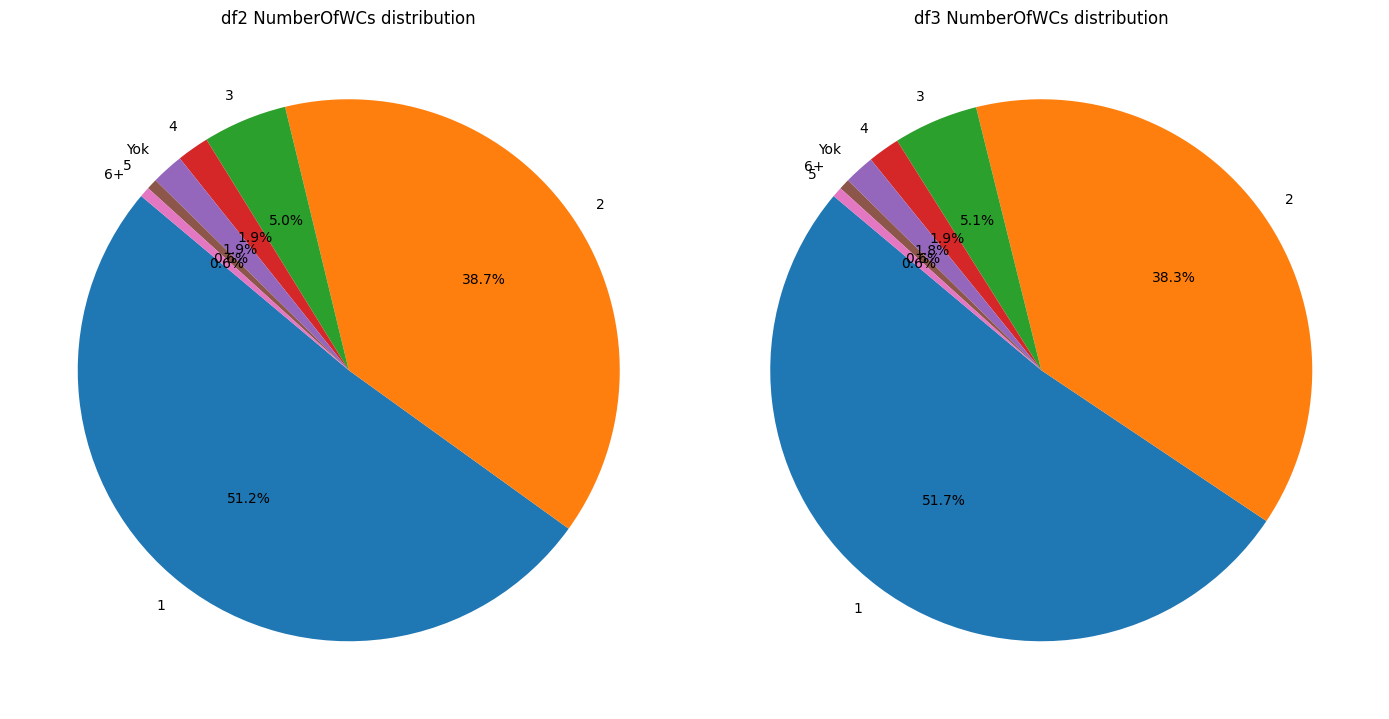

In [16]:
import matplotlib.pyplot as plt

df2_numberofwcs_percent = df2['NumberOfWCs'].value_counts(normalize=True) * 100
df3_numberofwcs_percent = df3['NumberOfWCs'].value_counts(normalize=True) * 100

plt.figure(figsize=(14, 8))

# df2 için pasta grafiği
plt.subplot(1, 2, 1)
plt.pie(df2_numberofwcs_percent, labels=df2_numberofwcs_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('df2 NumberOfWCs distribution')

# df3 için pasta grafiği
plt.subplot(1, 2, 2)
plt.pie(df3_numberofwcs_percent, labels=df3_numberofwcs_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('df3 NumberOfWCs distribution')

plt.tight_layout()
plt.show()


Görüğümüz gibi Yeni oluşturduğumuz df3 DataFrame'indede verilerimiz asıl veri setine (df2) yakın bir dağılım göstermektedir.Yani df3 dataframe'i df2 dataframe'ini temsil edebilir
diyebiliriz. Haydiii şimdi bunu nasıl test edecez


Not: Seed , özellikle dağılımları benzer gelmesi için özellikle seçilmemiştir,  isterseniz kendiniz rastgele başka bir sayı vererek deneyebilirsiniz tekrardan dağılımlar benzer çıkacaktır 


PEKİ BU df3 DEKI ITEM STATUS AÇIKÇA GÖZÜKÜYOR Kİ BİRBİRLERİNE ÇOK UYGUN VERİLER (yoksa değilmi ya :D) BU IKI VERININ BIRBIRINI IYI TEMSIL ETTIĞINI ISTATISTIKSEL OLARAK
NASIL KANITLAYABILIRIM ???? 
iki katagorik veri aynı dağılımı mı temsil ediyor hangi test ile anlaşılır ?

iki katagorik veri aynı anakütleden mi seçilmiştir hanti test ile anlaşılır ?

In [17]:
from scipy.stats import chi2_contingency

# İki kategorik değişkenin gözlenen frekans tablolarını oluşturun
observed_itemstatus = [[df2['ItemStatus'].value_counts()['Boş'], df2['ItemStatus'].value_counts()['Eşyalı']],
                       [df3['ItemStatus'].value_counts()['Boş'], df3['ItemStatus'].value_counts()['Eşyalı']]]

# Ki-kare testini uygulayın
chi2_itemstatus, p_itemstatus, _, _ = chi2_contingency(observed_itemstatus)

# p-değerlerini yazdırın
print("ItemStatus için Ki-kare istatistiği:", chi2_itemstatus)
print("ItemStatus için p-değeri:", p_itemstatus)


ItemStatus için Ki-kare istatistiği: 0.013039915168953756
ItemStatus için p-değeri: 0.909085238411677


In [18]:
itemstatus_df2 = df2['ItemStatus'].value_counts()
itemstatus_df3 = df3['ItemStatus'].value_counts()
observed_table = pd.concat([itemstatus_df2, itemstatus_df3], axis=1, keys=['df2', 'df3'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(observed_table)

print("ItemStatus için Ki-kare istatistiği:", chi2)
print("ItemStatus için p-değeri:", p)



ItemStatus için Ki-kare istatistiği: 0.013039915168953756
ItemStatus için p-değeri: 0.909085238411677


In [19]:
observed_numberofwcs = [
    [
        df2['NumberOfWCs'].value_counts().iloc[0],  
        df2['NumberOfWCs'].value_counts().iloc[1],  
        df2['NumberOfWCs'].value_counts().iloc[2],  
        df2['NumberOfWCs'].value_counts().iloc[3], 
        df2['NumberOfWCs'].value_counts()['Yok'],  
        df2['NumberOfWCs'].value_counts().iloc[4], 
        df2['NumberOfWCs'].value_counts()['6+']    
    ],
    [
        df3['NumberOfWCs'].value_counts().iloc[0],  
        df3['NumberOfWCs'].value_counts().iloc[1],  
        df3['NumberOfWCs'].value_counts().iloc[2],  
        df3['NumberOfWCs'].value_counts().iloc[3],   
        df3['NumberOfWCs'].value_counts()['Yok'],   
        df3['NumberOfWCs'].value_counts().iloc[4],  
        df3['NumberOfWCs'].value_counts()['6+']    
    ]
]

chi2_numberofwcs, p_numberofwcs, dof_numberofwcs, expected_numberofwcs = chi2_contingency(observed_numberofwcs)

print("NumberOfWCs için Ki-kare istatistiği:", chi2_numberofwcs)
print("NumberOfWCs için p-değeri:", p_numberofwcs)


NumberOfWCs için Ki-kare istatistiği: 1.4884020886558
NumberOfWCs için p-değeri: 0.9602612431428602


In [20]:
numberofwcs_df2 = df2['NumberOfWCs'].value_counts()
numberofwcs_df3 = df3['NumberOfWCs'].value_counts()
observed_table_wc = pd.concat([numberofwcs_df2, numberofwcs_df3], axis=1, keys=['df2', 'df3'])

chi2_wc, p_wc, dof_wc, expected_wc = chi2_contingency(observed_table_wc)

print("NumberOfWCs için Ki-kare istatistiği:", chi2_wc)
print("NumberOfWCs için p-değeri:", p_wc)


NumberOfWCs için Ki-kare istatistiği: 1.2682259423541065
NumberOfWCs için p-değeri: 0.9733808232752014


YANI DEMEK OLUYOR KI df3 TEKI NumberOfWCs ile ItemStatus , df2'deki hallerini ( verileri doldurulmamış hallerini ) TEMSİL EDEBİLİR DEMEKTİR ÇÜNKÜ P DEĞERLERİ 0.05'den 
BÜYÜK ÇIKMAKTA YANI ISTATISTIKSEL ANLAMDA IKI DATA FRAME ARASINDA BIR FARK YOKTUR ISPATLAMIŞ OLDUK

In [21]:
df3.isnull().sum()

district             0
price                0
GrossSquareMeters    0
BuildingAge          0
ItemStatus           0
NumberOfBathrooms    0
NumberOfWCs          0
NetSquareMeters      0
NumberOfRooms        0
dtype: int64

Gördüğünüz gibi hiçbir eksik veri kalmadı

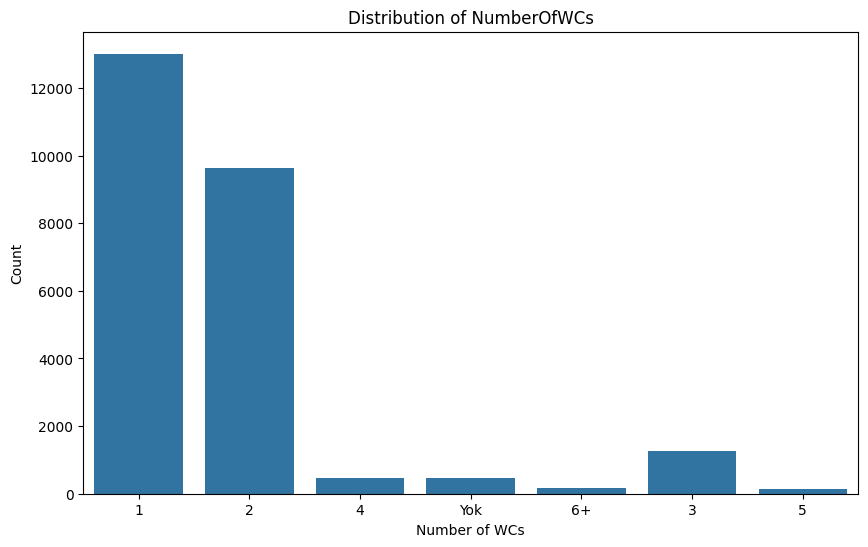

Tam Sayıları :
 NumberOfWCs
1      13010
2       9624
3       1272
4        478
Yok      457
6+       162
5        152
Name: count, dtype: int64


In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumberOfWCs', data=df3,)
plt.title('Distribution of NumberOfWCs')
plt.xlabel('Number of WCs')
plt.ylabel('Count')
plt.show()
print("Tam Sayıları :\n", df3['NumberOfWCs'].value_counts())

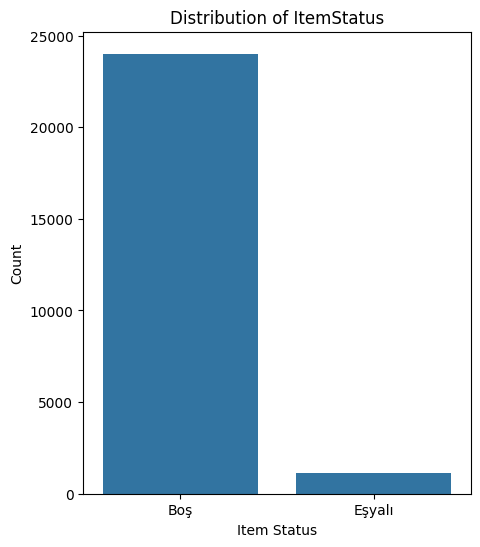

Tam Sayıları :
 ItemStatus
Boş       24008
Eşyalı     1147
Name: count, dtype: int64


In [23]:
plt.figure(figsize=(5, 6))
sns.countplot(x='ItemStatus', data=df3, order=['Boş', 'Eşyalı'])
plt.title('Distribution of ItemStatus')
plt.xlabel('Item Status')
plt.ylabel('Count')
plt.show()
print("Tam Sayıları :\n" ,df3['ItemStatus'].value_counts())

In [24]:
itemstatus_df2 = df2['ItemStatus'].value_counts()
itemstatus_df3 = df3['ItemStatus'].value_counts()
observed_table = pd.concat([itemstatus_df2, itemstatus_df3], axis=1, keys=['df2', 'df3'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(observed_table)

print("Ki-kare istatistiği:", chi2)
print("p-değeri:", p)


Ki-kare istatistiği: 0.013039915168953756
p-değeri: 0.909085238411677


In [25]:
#unutmuyum diye yazıyorum Bu kısma ara veriyorum çünkü sonra gelince hatırlıyım burada oda sayısını 3+1 ise mesela 3 oda 1 salon olarak iki ayrı sütun oluşturma
# işlemlerini yapıcaz yani tek sütunu iki yani sütun olarak ayırıcaz teferruatlı bi tık
#BİDE BI BIYERE CORELATİON HEATMAP KOY BAKIYIM ODA GUZEL YAW BEGENDIM HA

#room_types = df3["NumberOfRooms"].value_counts() # Value counts
#room_types

AŞŞAĞIDAKINI UNUTMA PRICE DEGISKENINI TEMIZLE SONRA BAK BAGAYIM NASIL DAĞILIYO NORMAL MI DAGILIYO NASI DAGILIYO YANE

NORMAL DAĞILMASINI İSTİYORUM , BU BİLGİ BİR ŞEYE YARAMIYICAK AMA OLSUN :D GÖRMEK İSTİYORUM HEM YAPABİLİYO MUYUM ONU GÖRÜCEM 

In [26]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

sorted_df3 = df3['price'].sort_values(ascending=False)
print(sorted_df3)

pd.reset_option("max_rows") 
pd.reset_option("max_columns")  

10145                         999,999TL
18557                         999,999TL
7426          999,000TLarrow_downward%5
18238         999,000TLarrow_downward%3
3418         999,000TLarrow_downward%10
9867                          999,000TL
9328                          999,000TL
2082                          999,000TL
18216                         999,000TL
6107                          999,000TL
1562                          999,000TL
9124                          999,000TL
22791                         999,000TL
2875                          999,000TL
22559                         999,000TL
22437                         999,000TL
18792                         998,000TL
9161                          998,000TL
23964        995,000TLarrow_downward%10
22428                         995,000TL
10557                         995,000TL
2419                          995,000TL
17399                         995,000TL
21440                         995,000TL
23474                         995,000TL


In [ ]:


# df3'ten bir kopya oluştur
df4 = df3.copy()

# price sütunundaki TL'yi ve geri kalanını sil
df4['price'] = df4['price'].str.split('TL').str[0]

# Virgülleri kaldır
df4['price'] = df4['price'].str.replace(',', '')


df4['price'] = pd.to_numeric(df4['price'])




In [30]:


pd.options.display.max_rows = None
pd.options.display.max_columns = None

sorted_df4 = df4['price'].sort_values(ascending=False)
print(sorted_df4)

pd.reset_option("max_rows") 
pd.reset_option("max_columns")  

15230    16000000000
21006     2000000000
2069      1750000000
21151     1750000000
14000     1460000000
509       1450000000
19917     1250000000
20230      761000000
20321      750000000
6442       739000000
19713      735000000
20520      700000000
5747       700000000
19880      650000000
24553      650000000
20521      600000000
1939       536000000
19882      515000000
5948       499000000
5834       490000000
19881      470000000
19719      450000000
20137      430000000
20912      420000000
24876      385000000
5288       345000000
5296       345000000
24552      300000000
5709       300000000
5671       280000000
24919      273000000
5547       270000000
5759       265000000
5761       265000000
5784       260000000
5419       250000000
20335      250000000
24889      250000000
20372      250000000
5426       250000000
24866      230000000
24858      230000000
20589      217500000
5349       215000000
5832       200000000
15109      175000000
19902      175000000
20390      17

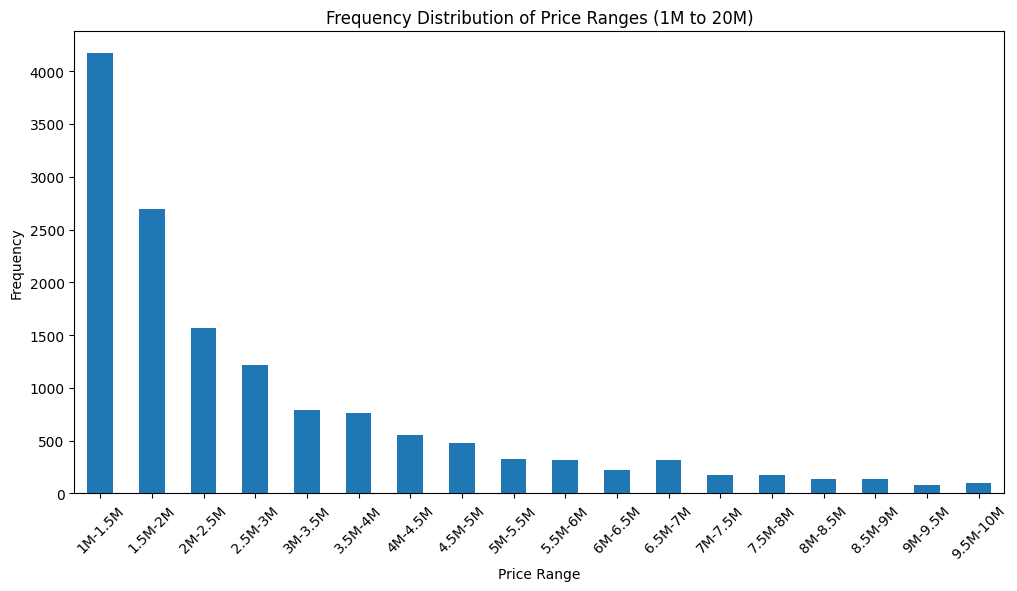

In [48]:


# Fiyat aralıklarını tanımla
price_bins = [1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000, 8500000, 9000000, 9500000, 10000000]
price_labels = ['1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M-3.5M', '3.5M-4M', '4M-4.5M', '4.5M-5M', '5M-5.5M', '5.5M-6M', '6M-6.5M', '6.5M-7M', '7M-7.5M', '7.5M-8M', '8M-8.5M', '8.5M-9M', '9M-9.5M', '9.5M-10M']

# Fiyatları kategorilere ayır ve yeni bir sütun olarak ekle
df4['price_range'] = pd.cut(df4['price'], bins=price_bins, labels=price_labels, right=False)

# Fiyat aralıklarının frekansını hesapla
price_range_counts = df4['price_range'].value_counts().sort_index()

# Frekans grafiği çizimi
plt.figure(figsize=(12, 6))
price_range_counts.plot(kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Price Ranges (1M to 10M)')
plt.xticks(rotation=45)
plt.show()


BU KISIMDA ASLINDA 50k ALTI Ve 20M USTU EVLERI DROPLAYIP (HIC KULLANMAYIP) O KISIMLARI KULLANARAK MODELİ EĞİTİP PREDICTION EDEBILIRSIN CUNKU COK YUKSEK VE COK DUSUK DEĞERLER EV FİYATLARI ICIN AYKIRI DEGERLER OLARAK KABUL EDEBILIRIZ CUNKU VERI BU SEKLDE GUZEL DAĞILIM SAĞLAMIYOR HATTA BELKI 20 DEGIL 10M USTUNU BIRAKABILIRSIN

In [46]:
#fiyat aralıkları 
price_bins = [1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000, 8500000, 9000000, 9500000, 10000000, 10500000, 11000000, 11500000, 12000000, 12500000, 13000000, 13500000, 14000000, 14500000, 15000000, 15500000, 16000000, 16500000, 17000000, 17500000, 18000000, 18500000, 19000000, 19500000, 20000000]

# Fiyatları belirtilen aralıklara göre grupla
price_groups = pd.cut(df4['price'], bins=price_bins)

# Her aralıktaki ev sayısını hesapla
price_range_house_counts = df4.groupby(price_groups).size()


print(price_range_house_counts)


price
(1000000, 1500000]      4340
(1500000, 2000000]      2568
(2000000, 2500000]      1583
(2500000, 3000000]      1146
(3000000, 3500000]       809
(3500000, 4000000]       694
(4000000, 4500000]       583
(4500000, 5000000]       451
(5000000, 5500000]       315
(5500000, 6000000]       297
(6000000, 6500000]       270
(6500000, 7000000]       265
(7000000, 7500000]       163
(7500000, 8000000]       175
(8000000, 8500000]       142
(8500000, 9000000]       101
(9000000, 9500000]        79
(9500000, 10000000]       94
(10000000, 10500000]      58
(10500000, 11000000]      71
(11000000, 11500000]      51
(11500000, 12000000]      79
(12000000, 12500000]      49
(12500000, 13000000]      56
(13000000, 13500000]      64
(13500000, 14000000]      69
(14000000, 14500000]      32
(14500000, 15000000]      52
(15000000, 15500000]      22
(15500000, 16000000]      33
(16000000, 16500000]      25
(16500000, 17000000]      26
(17000000, 17500000]      21
(17500000, 18000000]      34
(1800000

C:\Users\gokde\AppData\Local\Temp\ipykernel_10980\2591114863.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_house_counts = df4.groupby(price_groups).size()
